**Phase 1:**            
Book Dropout Predictor (MLP from Scratch)

**DATASET:**     Goodbooks-10K     
https://www.kaggle.com/datasets/zygmunt/goodbooks-10k


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Load Data:**      
We loaded books.csv and ratings.csv into pandas DataFrames from Google Drive.

In [3]:
import pandas as pd
books = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/archive_2/books.csv', sep=',', encoding='utf-8')
ratings = pd.read_csv('/content/drive/MyDrive/ACM-TASKS/archive_2/ratings.csv', sep=',', encoding='utf-8')

**Data Preparation:**     
Merged ratings with book info, created binary labels, selected input features, and cleaned missing values.

In [5]:
data = ratings.merge(books, on='book_id')
data['label'] = (data['rating'] >= 4).astype(int)
features = data[['average_rating', 'rating']]
labels = data['label']
features = features.dropna()
labels = labels.loc[features.index]

**Feature Scaling & Train-Test Split:**       
Normalized the input features and split the data into training and testing sets.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

**Convert to Tensors & Prepare DataLoader:**      
Converted training data into PyTorch tensors and created a DataLoader for batch training.

In [8]:
import torch
from torch.utils.data import TensorDataset, DataLoader
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

**Build MLP Model :**     
Defined a simple neural network with two hidden layers using ReLU and a Sigmoid output for binary classification.

In [9]:
import torch.nn as nn
import torch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.input_layer = nn.Linear(2, 16)
        self.hidden_layer = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

In [10]:
model = MLP()

**Train the Model:**      
Trained the MLP using binary cross-entropy loss and Adam optimizer over 20 epochs while tracking and printing the loss.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
model = MLP()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20
losses = []
for epoch in range(epochs):
    total_loss = 0
    for inputs, targets in train_loader:
        predictions = model(inputs)
        loss = loss_function(predictions, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    average_loss = total_loss / len(train_loader)
    losses.append(average_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {average_loss:.4f}")

Epoch 1/20 - Loss: 0.1301
Epoch 2/20 - Loss: 0.0003
Epoch 3/20 - Loss: 0.0001
Epoch 4/20 - Loss: 0.0000
Epoch 5/20 - Loss: 0.0000
Epoch 6/20 - Loss: 0.0000
Epoch 7/20 - Loss: 0.0000
Epoch 8/20 - Loss: 0.0000
Epoch 9/20 - Loss: 0.0000
Epoch 10/20 - Loss: 0.0000
Epoch 11/20 - Loss: 0.0000
Epoch 12/20 - Loss: 0.0000
Epoch 13/20 - Loss: 0.0000
Epoch 14/20 - Loss: 0.0000
Epoch 15/20 - Loss: 0.0000
Epoch 16/20 - Loss: 0.0000
Epoch 17/20 - Loss: 0.0000
Epoch 18/20 - Loss: 0.0000
Epoch 19/20 - Loss: 0.0000
Epoch 20/20 - Loss: 0.0000


**Visualize Training Loss:**   
Plotted the loss over epochs to observe how the model improves during training.

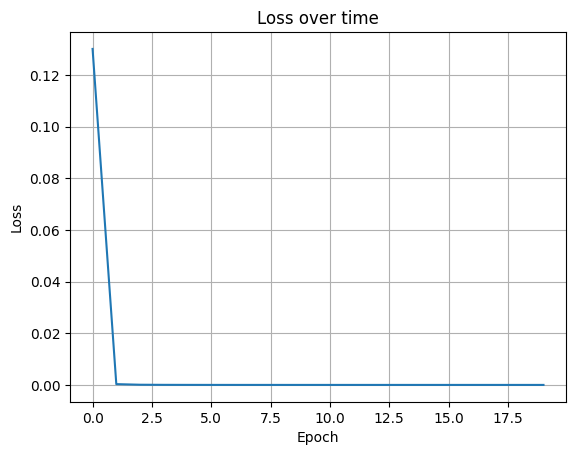

In [12]:
plt.plot(losses)
plt.title("Loss over time")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

**Evaluate Model Performance:**     
Tested the model on unseen data and calculated accuracy, precision, recall, and F1-score to assess classification quality.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_labels = (predictions >= 0.5).float()
y_true = y_test_tensor.numpy()
y_pred = predicted_labels.numpy()
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print("Evaluation on Test Data:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Evaluation on Test Data:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000


**Summary:**      
I started by loading the book and rating data from my Google Drive and merged them to create a single dataset. I created a label column where ratings ≥ 4 were marked as books likely to be finished. Then, I selected useful features, cleaned the data, and scaled the values to help the model learn better. After that, I built a simple neural network (MLP) using PyTorch and trained it on the data. I tracked the loss during training and plotted it to see if the model was learning. Finally, I evaluated the model’s performance using accuracy, precision, recall, and F1-score to check how well it predicted if a user would finish a book.